This project is ...

Importing the geojson file and producign the h5 file from it. The GEE already sorted the species from TreeSatAI.csv file hierarchically, so only need to convert to h5 file.

In [1]:
import os
import ast
import h5py
import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf

In [3]:


# This code block is for producing .h5 files from .geojson files. No need to run this code block if you already have .h5 files.
# Create the output directory if it doesn't exist
output_dir = "C:/Users/berky/workspace/projects/ds-earth-observation/data/h5data"
os.makedirs(output_dir, exist_ok=True)

# Path to the folder containing the GeoJSON files
input_dir = "C:/Users/berky/workspace/projects/ds-earth-observation/data/TreeSatAI"

# Iterate over each GeoJSON file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".geojson"):
        file_path = os.path.join(input_dir, filename)
        
        # Read the GeoJSON file
        gdf = gpd.read_file(file_path)
        
        # Convert GeoDataFrame to Pandas DataFrame
        gdf['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)  # Convert geometries to WKT strings
        
        # Save to HDF5 format
        output_file = os.path.join(output_dir, filename.replace(".geojson", ".h5"))
        gdf.to_hdf(output_file, key="tree_species", mode="w")


C:\Users\berky\AppData\Local\Temp\ipykernel_14068\726985152.py:18: UserWarning: Geometry column does not contain geometry.
  gdf['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)  # Convert geometries to WKT strings
C:\Users\berky\AppData\Local\Temp\ipykernel_14068\726985152.py:22: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6',
       'B11_7', 'B12',
       ...
       'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7',
       'l1_leaf_types', 'l2_genus', 'l3_species', 'geometry'],
      dtype='object', length=125)]

  gdf.to_hdf(output_file, key="tree_species", mode="w")
C:\Users\berky\AppData\Local\Temp\ipykernel_14068\726985152.py:18: UserWarning: Geometry column does not contain geometry.
  gdf['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)  # Convert geometries to WK

In [ ]:
#D do not run this cell...
# The rest directly uses geopandas for working with geojson files


# this should match the name of the downloaded data set
filename = 'data/h5data/broadleaf_long-lived deciduous_european ash.h5'
dataset = h5py.File(filename, "r")
print(list(dataset.keys()))
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])
    print(data)

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    #data = list(f[a_group_key])
    # preferred methods to get dataset values:
    #ds_obj = f[a_group_key]      # returns as a h5py dataset object
    #ds_arr = f[a_group_key][()]  # returns as a numpy array



['tree_species']
Keys: <KeysViewHDF5 ['tree_species']>
<class 'h5py._hl.group.Group'>
['axis0', 'axis1', 'block0_items', 'block0_values']


In [2]:
geojs = gpd.read_file("data/combined_data.geojson")
geojs.head()


,id,B11,B11_1,B11_2,B11_3,B11_4,B11_5,B11_6,B11_7,B12,...,SAVI_2,SAVI_3,SAVI_4,SAVI_5,SAVI_6,SAVI_7,l1_leaf_types,l2_genus,l3_species,geometry
0,0000000000000000050b,"[ [ 0.23570001125335693, 0.23570001125335693, ...",None,"[ [ 0.25260001420974731, 0.25260001420974731, ...","[ [ 0.27784997224807739, 0.27784997224807739, ...","[ [ 0.29129999876022339, 0.29129999876022339, ...","[ [ 0.25154998898506165, 0.25154998898506165, ...","[ [ 0.22380000352859497, 0.22380000352859497, ...","[ [ 0.23739999532699585, 0.23739999532699585, ...","[ [ 0.17915000021457672, 0.17915000021457672, ...",...,"[ [ 0.46635446044782425, 0.51628271247486057, ...","[ [ 0.45232084619567836, 0.48586394260625354, ...","[ [ 0.47298505679703168, 0.54238142358992913, ...","[ [ 0.45717626851395388, 0.50626567430770719, ...","[ [ 0.4336604545227053, 0.45122892352849098, 0...","[ [ 0.37985436917893722, 0.41816677176163664, ...",broadleaf,beech,european beech,POINT (10.08215 53.35538)
1,0000000000000000050c,"[ [ 0.31589999794960022, 0.31589999794960022, ...","[ [ 0.33454999327659607, 0.33454999327659607, ...","[ [ 0.36035001277923584, 0.36035001277923584, ...","[ [ 0.3393000066280365, 0.3393000066280365, 0....","[ [ 0.36329999566078186, 0.36329999566078186, ...","[ [ 0.33149999380111694, 0.33149999380111694, ...","[ [ 0.3562999963760376, 0.3562999963760376, 0....","[ [ 0.26205000281333923, 0.26205000281333923, ...","[ [ 0.26620000600814819, 0.26620000600814819, ...",...,"[ [ 0.30217383897906858, 0.30217383897906858, ...","[ [ 0.34171684992287804, 0.34171684992287804, ...","[ [ 0.37521016608266899, 0.37521016608266899, ...","[ [ 0.35093790837565908, 0.35093790837565908, ...","[ [ 0.36218037775772949, 0.36218037775772949, ...","[ [ 0.29028977943399581, 0.29028977943399581, ...",broadleaf,beech,european beech,POINT (11.22099 53.03761)
2,0000000000000000050d,"[ [ 0.19909998774528503, 0.18310000002384186, ...","[ [ 0.25055000185966492, 0.2463500052690506, 0...","[ [ 0.33680000901222229, 0.29304999113082886, ...","[ [ 0.23849999904632568, 0.23765000700950623, ...","[ [ 0.23139999806880951, 0.22450000047683716, ...","[ [ 0.2101999968290329, 0.19589999318122864, 0...","[ [ 0.14219999313354492, 0.14100000262260437, ...","[ [ 0.19509999454021454, 0.19310000538825989, ...","[ [ 0.15610000491142273, 0.15029999613761902, ...",...,"[ [ 0.23599135975206254, 0.25119240856393393, ...","[ [ 0.37840828044771535, 0.36563144031076478, ...","[ [ 0.32605950778513593, 0.33497930084407079, ...","[ [ 0.28740159636020562, 0.29021449149222278, ...","[ [ 0.11263318692306315, 0.11359592549616324, ...","[ [ 0.28355632419479582, 0.22709293909398284, ...",broadleaf,beech,european beech,POINT (9.2431 53.49512)
3,0000000000000000050e,"[ [ 0.22779999673366547, 0.22419999539852142, ...","[ [ 0.26010000705718994, 0.25749999284744263, ...","[ [ 0.25910001993179321, 0.26665002107620239, ...","[ [ 0.26684999465942383, 0.26635000109672546, ...","[ [ 0.29269999265670776, 0.29210001230239868, ...","[ [ 0.2517000138759613, 0.25279998779296875, 0...","[ [ 0.20514999330043793, 0.20509999990463257, ...","[ [ 0.23939999938011169, 0.25, 0.25, 0.25, 0.2...","[ [ 0.17659999430179596, 0.17749999463558197, ...",...,"[ [ 0.3759057105442507, 0.41230284246731103, 0...","[ [ 0.43461269893859789, 0.48588232352439198, ...","[ [ 0.44285715502135603, 0.53732692779493563, ...","[ [ 0.40695693538529149, 0.45188037422884869, ...","[ [ 0.29974962619042173, 0.38114473181451014, ...","[ [ 0.35634329211131782, 0.42898270951177669, ...",broadleaf,beech,european beech,POINT (9.3938 53.13199)
4,0000000000000000050f,"[ [ 0.25600001215934753, 0.26150000095367432, ...","[ [ 0.28685000538825989, 0.29079997539520264, ...","[ [ 0.24909999966621399, 0.25040000677108765, ...","[ [ 0.25139999389648438, 0.25879999995231628, ...","[ [ 0.27120000123977661, 0.27480000257492065, ...","[ [ 0.25420001149177551, 0.2625499963760376, 0...","[ [ 0.21724998950958252, 0.21725000441074371, ...","[ [ 0.22020000219345093, 0.22470000386238098, ...","[ [ 0.195800

In [4]:
print(list(geojs.keys()))
print(geojs.columns)


['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4

In [44]:
geojs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37907 entries, 0 to 37906
Columns: 125 entries, id to geometry
dtypes: geometry(1), object(124)
memory usage: 36.2+ MB


In [66]:
print(geojs.isnull().any())

id               False
B11              False
B11_1             True
B11_2             True
B11_3             True
                 ...  
SAVI_7            True
l1_leaf_types    False
l2_genus         False
l3_species       False
geometry         False
Length: 125, dtype: bool


In [67]:
# for now we just dorp the None
clean_select_df = geojs.dropna().reset_index(drop=True)
print(clean_select_df.shape)
print(clean_select_df.isnull().any())
geojs = clean_select_df

(26268, 125)
id               False
B11              False
B11_1            False
B11_2            False
B11_3            False
                 ...  
SAVI_7           False
l1_leaf_types    False
l2_genus         False
l3_species       False
geometry         False
Length: 125, dtype: bool


In [68]:
feature_columns = [col for col in geojs.columns if col.startswith(('NDVI', 'EVI', 'SAVI'))]
X = geojs[feature_columns]

In [69]:
X.shape

(26268, 32)

In [72]:
# y is the target for training and it doesnt have to be only leaf types

y = geojs['l1_leaf_types']
y.shape

(26268,)

In [73]:
import ast
def flattenDf_str(df,col):
  #  flatten 5*5 matrix(string) col in df and return a new df which include col_1~col_25

  flattened_df = pd.DataFrame(
      df[col].apply(lambda x: np.array(ast.literal_eval(x)).flatten()).tolist(),
      columns=[f'new{col}_{i+1}' for i in range(25)]
  )
  df_new = pd.concat([df, flattened_df], axis=1)
  df_new = df_new.drop(columns=[col])
  return df_new

for col in X[2:]:
  print(col)
  X = flattenDf_str(X,col)
  print(X.shape)

EVI
(26268, 56)
EVI2
(26268, 80)
EVI2_1
(26268, 104)
EVI2_2
(26268, 128)
EVI2_3
(26268, 152)
EVI2_4
(26268, 176)
EVI2_5
(26268, 200)
EVI2_6
(26268, 224)
EVI2_7
(26268, 248)
EVI_1
(26268, 272)
EVI_2
(26268, 296)
EVI_3
(26268, 320)
EVI_4
(26268, 344)
EVI_5
(26268, 368)
EVI_6
(26268, 392)
EVI_7
(26268, 416)
NDVI
(26268, 440)
NDVI_1
(26268, 464)
NDVI_2
(26268, 488)
NDVI_3
(26268, 512)
NDVI_4
(26268, 536)
NDVI_5
(26268, 560)
NDVI_6
(26268, 584)
NDVI_7
(26268, 608)
SAVI
(26268, 632)
SAVI_1
(26268, 656)
SAVI_2
(26268, 680)
SAVI_3
(26268, 704)
SAVI_4
(26268, 728)
SAVI_5
(26268, 752)
SAVI_6
(26268, 776)
SAVI_7
(26268, 800)


In [75]:
X.dtypes

newEVI_1        float64
newEVI_2        float64
newEVI_3        float64
newEVI_4        float64
newEVI_5        float64
                 ...   
newSAVI_7_21    float64
newSAVI_7_22    float64
newSAVI_7_23    float64
newSAVI_7_24    float64
newSAVI_7_25    float64
Length: 800, dtype: object

In [28]:
# this part has no problems just adjust y to x
#le = LabelEncoder()
#y = le.fit_transform(geojs['l1_leaf_types']) # Adjust for target column

In [37]:
X.shape

(26268, 32)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21014, 800), (5254, 800), (21014,), (5254,))

In [78]:
X_train.head()

,newEVI_1,newEVI_2,newEVI_3,newEVI_4,newEVI_5,newEVI_6,newEVI_7,newEVI_8,newEVI_9,newEVI_10,...,newSAVI_7_16,newSAVI_7_17,newSAVI_7_18,newSAVI_7_19,newSAVI_7_20,newSAVI_7_21,newSAVI_7_22,newSAVI_7_23,newSAVI_7_24,newSAVI_7_25
11127,0.284577,0.284577,0.269228,0.269228,0.277461,0.301067,0.301067,0.284980,0.284980,0.266932,...,0.467570,0.467570,0.471922,0.471922,0.468733,0.480541,0.480541,0.477285,0.477285,0.484931
2220,0.307314,0.292074,0.331500,0.331500,0.359549,0.299985,0.296235,0.327977,0.327977,0.365291,...,0.170989,0.152509,0.156215,0.156215,0.158127,0.145253,0.139455,0.141266,0.141266,0.148197
16966,0.300550,0.300550,0.293466,0.293466,0.281055,0.356458,0.356458,0.370679,0.370679,0.302702,...,0.444312,0.444312,0.419540,0.419540,0.402226,0.422793,0.422793,0.419352,0.419352,0.389251
22845,0.315573,0.313354,0.313354,0.344812,0.344812,0.276961,0.318005,0.318005,0.323804,0.323804,...,0.307631,0.276787,0.276787,0.297627,0.297627,0.285833,0.284468,0.284468,0.290569,0.290569
13745,0.273849,0.273849,0.275799,0.273237,0.273237,0.292311,0.292311,0.284287,0.268084,0.268084,...,0.186240,0.186240,0.213563,0.202444,0.202444,0.166987,0.166987,0.187738,0.188509,0.188509


In [ ]:
def flatten_feature_column(column, prefix):
    # Convert string to array
    arrays = column.apply(eval)  # Convert string representation of lists to actual lists
    max_len = max(len(arr) for arr in arrays)  # Find the longest list

    # Pad all lists to the same length with NaNs to create a rectangular DataFrame
    padded_arrays = [arr + [None] * (max_len - len(arr)) for arr in arrays]
    flattened = pd.DataFrame(padded_arrays, columns=[f"{prefix}_{i}" for i in range(max_len)])
    return flattened

# Apply to feature columns
flattened_columns = []
for col in feature_columns:  # Replace with your list of feature columns
    flattened = flatten_feature_column(X_train[col], col)
    flattened_columns.append(flattened)

# Combine flattened columns back into the dataset
X_flattened = pd.concat(flattened_columns, axis=1)

TypeError: eval() arg 1 must be a string, bytes or code object

In [79]:
# when we managed to flatten the dataset we can now use it for training


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
pop_pred_rf = rf.predict(X_test)

In [92]:
pop_pred_rf_series = pd.Series(pop_pred_rf, index=y_test.index)
pop_pred_rf_series

11032    needleleaf
10351     broadleaf
8157      broadleaf
5762      broadleaf
8919      broadleaf
            ...    
11551     broadleaf
14704    needleleaf
12568    needleleaf
4550      broadleaf
21748    needleleaf
Length: 5254, dtype: object

In [91]:
y_test

11032     broadleaf
10351     broadleaf
8157      broadleaf
5762      broadleaf
8919      broadleaf
            ...    
11551     broadleaf
14704    needleleaf
12568     broadleaf
4550      broadleaf
21748    needleleaf
Name: l1_leaf_types, Length: 5254, dtype: object

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test contains the true labels and pop_pred_rf_series contains the predicted labels
accuracy = accuracy_score(y_test, pop_pred_rf_series)
precision = precision_score(y_test, pop_pred_rf_series, average='weighted')
recall = recall_score(y_test, pop_pred_rf_series, average='weighted')
f1 = f1_score(y_test, pop_pred_rf_series, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.8986621384348801
Recall: 0.8985534830605253
F1 Score: 0.8984025152998149
Accuracy: 0.8985534830605253


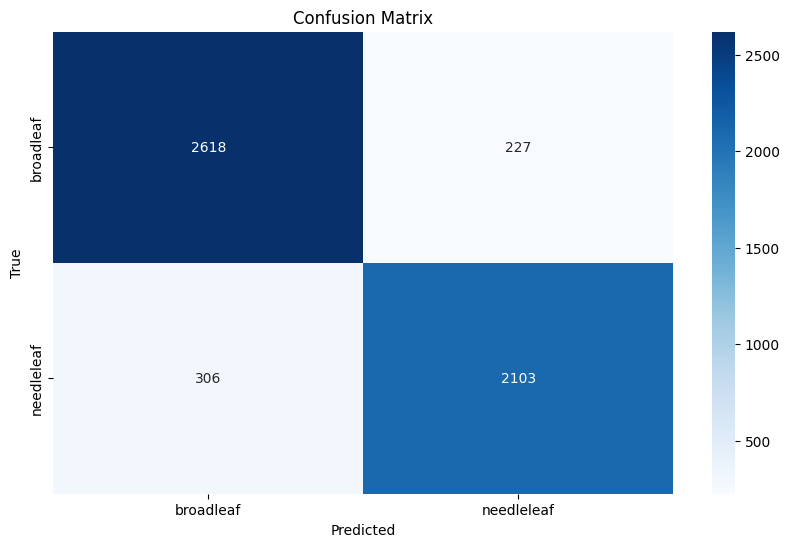

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and pop_pred_rf_series contains the predicted labels
# Convert the series to numpy arrays if they are not already
y_test = np.array(y_test)
pop_pred_rf_series = np.array(pop_pred_rf_series)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pop_pred_rf_series, labels=["broadleaf", "needleleaf"])

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["broadleaf", "needleleaf"], yticklabels=["broadleaf", "needleleaf"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()